In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
train = train.fillna('')
test = test.fillna('')

In [8]:
train['data'] = train['title'] + ". "+train['author']
test['data'] = test['title'] + ". "+ test['author']

In [9]:
#class imbalance
print(train['label'].value_counts())
fake_news_count =len(train[train['label']==1])
real_news_count = len(train[train['label']== 0])

1    10413
0    10387
Name: label, dtype: int64


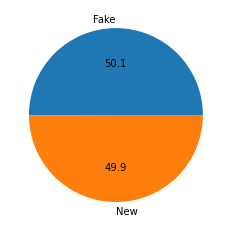

In [10]:
y = np.array([fake_news_count,real_news_count])
mylabels = ['Fake','New']
plt.pie(y,labels=mylabels,autopct='%.1f')
plt.show()


In [11]:
train['len_text'] = train['data'].apply(lambda x : len(x))

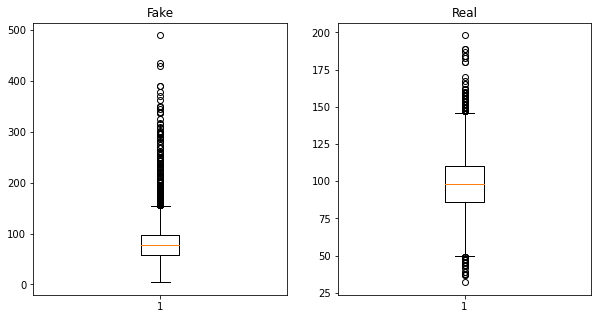

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.boxplot(train[train['label']==1]['len_text'])
ax1.set_title('Fake')
ax2.boxplot(train[train['label']==0]['len_text'])
ax2.set_title('Real')

plt.show()

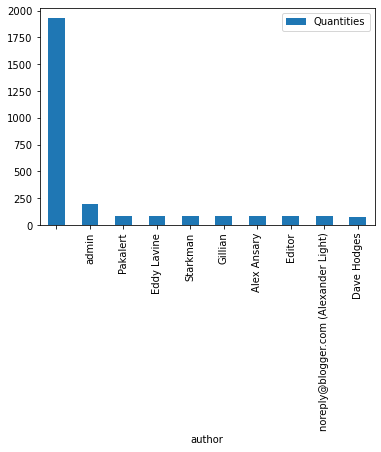

In [13]:
#fake news have less words compared to real
#now let's check the top author's for each class
#Fake New author
fake_author = pd.DataFrame({'author':train[train['label']==1]['author'].value_counts().head(10).index,'Quantities':train[train['label']==1]['author'].value_counts().head(10)})

fake_author.plot(kind='bar',x='author',y='Quantities')

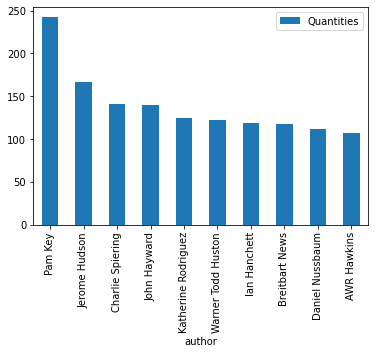

In [14]:
real_author = pd.DataFrame({'author':train[train['label']==0]['author'].value_counts().head(10).index,'Quantities':train[train['label']==0]['author'].value_counts().head(10)})

real_author.plot(kind='bar',x='author',y='Quantities')

In [15]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

lm = WordNetLemmatizer()

In [16]:
# train.dropna(subset=['title'],inplace=True)
stop_words=stopwords.words('english')
def preprocess(text):
    text=str(text)
    text=text.lower()
    text.translate(str.maketrans('', '', string.punctuation))
    text=word_tokenize(text)
    text=[lm.lemmatize(word) for word in text if text not in stop_words]
    text=" ".join(text)
    return text
    

In [17]:
train['data']=train['data'].apply(preprocess)

In [20]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

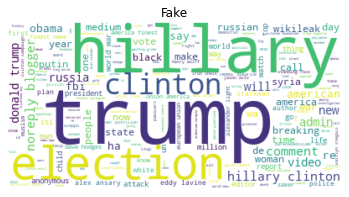

In [21]:
#checking the words that are most prominent/important in both the classes
wc = WordCloud(background_color = 'white')
wc.generate(' '.join(train[train['label']==1]['data']))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Fake')
plt.axis('off')
plt.show()

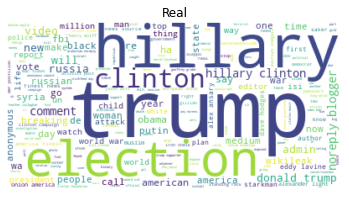

In [22]:
wc = WordCloud(background_color = 'white')
wc.generate(' '.join(train[train['label']==1]['data']))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Real')
plt.axis('off')
plt.show()

In [23]:
X=train['data']
y=train['label']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression

In [25]:
#Create a base model usng simplest logistic regression on both count vectorizer and tf_idf
#bow
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

In [26]:
#tfidf

tf_idf = TfidfVectorizer(
    analyzer="word",
    preprocessor=None, stop_words='english', max_features=None)    

X_tfidf= tf_idf.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X_bow, y, test_size=0.33, random_state=42)

#creating a base model using bow vectors
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print("the accuracy score for LR using Bow is :",score)

average_precision = average_precision_score(y_test, predictions)
print(average_precision)

the accuracy score for LR using Bow is : 0.9873251748251748
0.9784924275574336


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X_tfidf, y, test_size=0.33, random_state=42)

#creating a base model using bow vectors
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print("The accuracy for LR using tfidf is ,",score)

average_precision = average_precision_score(y_test, predictions)
print(average_precision)

The accuracy for LR using tfidf is , 0.9723193473193473
0.9514523099092849


In [29]:
print("According to the above baseline fit, BoW performs better, let's test on other models")

According to the above baseline fit, BoW performs better, let's test on other models


In [30]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
#using tf-idf
X_train, X_test, y_train, y_test = train_test_split( X_tfidf, y, test_size=0.33, random_state=42)
# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f'Model Accuracy: {tree.score(X_test, y_test)}')

Model Accuracy: 0.9922785547785548


In [31]:
#using bow
X_train, X_test, y_train, y_test = train_test_split( X_bow, y, test_size=0.33, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f'Model Accuracy: {tree.score(X_test, y_test)}')

Model Accuracy: 0.9944638694638694


In [32]:
print("Using BoW is proving to give us slightly better results, random forest has the highest accuracy of 0.9944")

Using BoW is proving to give us slightly better results, random forest has the highest accuracy of 0.9944


In [33]:
#lets try SGD on BoW
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split( X_bow, y, test_size=0.33, random_state=42)
clf = SGDClassifier(penalty='l2',loss='hinge',max_iter=100)
clf.fit(X_train, y_train)
print(f'Model Accuracy: {clf.score(X_test, y_test)}')

Model Accuracy: 0.988490675990676


In [34]:
#Just to check if we can get a better accuracy using LSTM
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
X_lstm=train['data']
y_lstm=Y = pd.get_dummies(train['label']).values


In [36]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_lstm.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23333 unique tokens.


In [37]:
X_l= tokenizer.texts_to_sequences(X_lstm.values)
X_l= pad_sequences(X_l, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_l.shape)

Shape of data tensor: (20800, 250)


In [38]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split( X_l, y_lstm, test_size=0.33, random_state=42)
print('Shape of data tensor:', Xl_train.shape,yl_train.shape)

Shape of data tensor: (13936, 250) (13936, 2)


In [39]:
lstm = Sequential()
lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_l.shape[1]))
lstm.add(SpatialDropout1D(0.2))
lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm.add(Dense(2, activation='softmax'))
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = lstm.fit(Xl_train, yl_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 12542 samples, validate on 1394 samples
Epoch 1/5
12542/12542 [==============================] - 464s 37ms/sample - loss: 0.1632 - accuracy: 0.9317 - val_loss: 0.0242 - val_accuracy: 0.9914
Epoch 2/5
12542/12542 [==============================] - 482s 38ms/sample - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0167 - val_accuracy: 0.9950
Epoch 3/5
12542/12542 [==============================] - 506s 40ms/sample - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0215 - val_accuracy: 0.9943
Epoch 4/5
12542/12542 [==============================] - 510s 41ms/sample - loss: 3.9650e-04 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9978
Epoch 5/5
12542/12542 [==============================] - 552s 44ms/sample - loss: 1.1639e-04 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9964


In [40]:
accr = lstm.evaluate(Xl_test,yl_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6864/6864 [==============================] - 27s 4ms/sample - loss: 0.0273 - accuracy: 0.9926
Test set
  Loss: 0.027
  Accuracy: 0.993
